### Importar librerías

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Importar Datasets

In [119]:
df_train = pd.read_csv('house_train_raw.csv')
df_test = pd.read_csv('houses_test_raw.csv')

## Análisis exploratorio

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [66]:
df_train.duplicated().sum()
#No hay duplicados

0

In [121]:
df_train.info()
#Hay valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [122]:
#Valores faltantes:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


---  
## Regresión linear usando sólo los features con una correlación con respecto al target(SalePrice) mayor a 0.5

In [132]:
#Features con mayor correlación con respecto al target(SalePrice)
features = df_train.corr()["SalePrice"][df_train.corr().SalePrice > 0.5].index.values
df_corr = df_train[features]
df_corr

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


<AxesSubplot:>

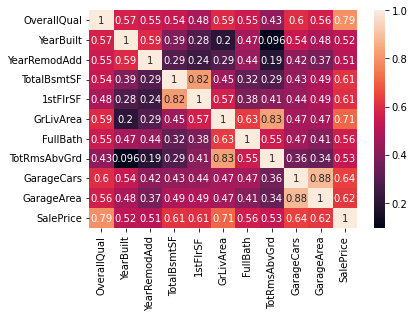

In [134]:
#Correlación entre features
sns.heatmap(df_corr.corr(), annot=True)

## Graficas para verificar dicha correlación

### Relación entre OverallQual y SalePrice:

In [141]:
# OverallQual: Rates the overall material and finish of the house
px.box(df_train, x="OverallQual", y="SalePrice", color="OverallQual",title="Relación entre OverallQual y SalePrice")

##### Encontramos que efectivamente el OverallQual influye en el précio de las casas  

### Relación entre YearBuilt y SalePrice:

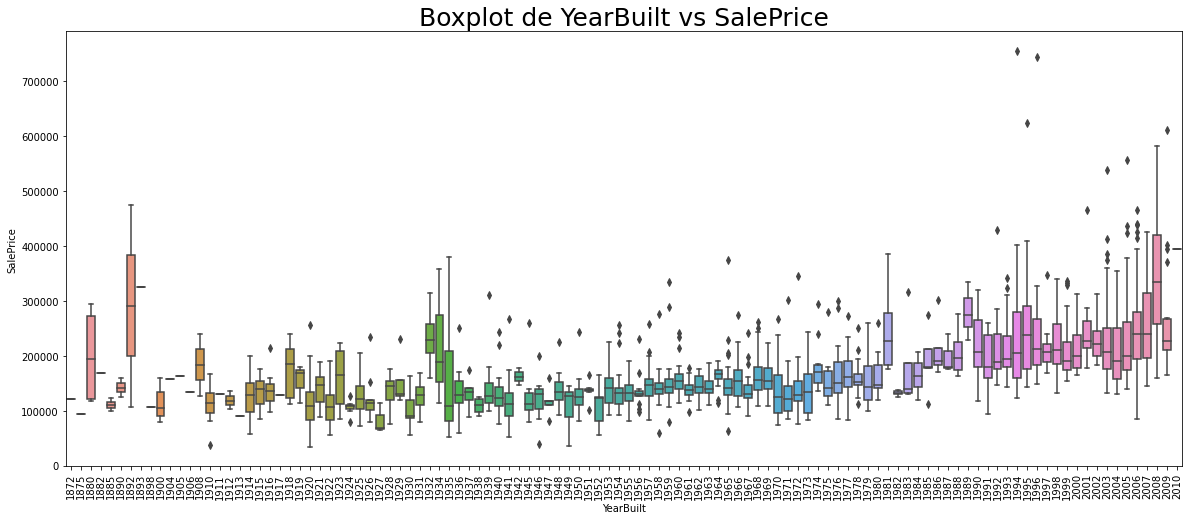

In [140]:
#YearBuilt: Original construction date
f, ax= plt.subplots(figsize=(20,8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df_train)
plt.xticks(rotation=90)
plt.title("Boxplot de YearBuilt vs SalePrice", fontsize=25)
plt.show()

##### La relación se ve pero no es tan fuerte y existen muchos outliers

### Relación entre YearRemodAdd y SalePrice:

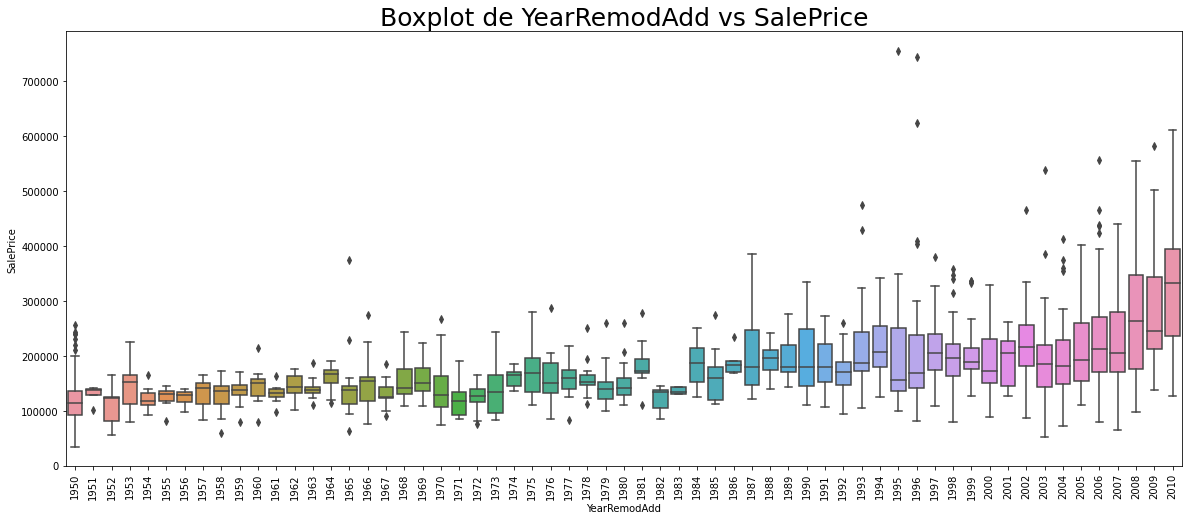

In [143]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
f, ax= plt.subplots(figsize=(20,8))
fig = sns.boxplot(x="YearRemodAdd", y="SalePrice", data=df_train)
plt.xticks(rotation=90)
plt.title("Boxplot de YearRemodAdd vs SalePrice", fontsize=25)
plt.show()

##### Se ve una relación pero no es tan fuerte, además presenta bastantes outliers

### Relación entre TotalBsmtSF y SalePrice:

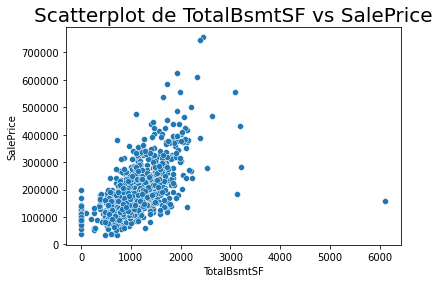

In [146]:
#TotalBsmtSF: Total square feet of basement area
sns.scatterplot(y="SalePrice", x="TotalBsmtSF", data=df_train)
plt.title("Scatterplot de TotalBsmtSF vs SalePrice", fontsize=20)
plt.show()

##### Existe la relación. Existen outliers

### Relación entre 1stFlrSF y SalePrice

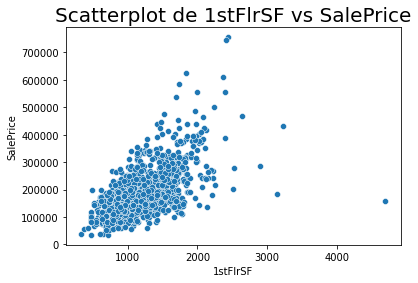

In [148]:
#1stFlrSF: First Floor square feet
sns.scatterplot(y="SalePrice", x="1stFlrSF", data=df_train)
plt.title("Scatterplot de 1stFlrSF vs SalePrice", fontsize=20)
plt.show()

##### Existe la relación. Existen outliers

### Relación entre GrLivArea y SalePrice:

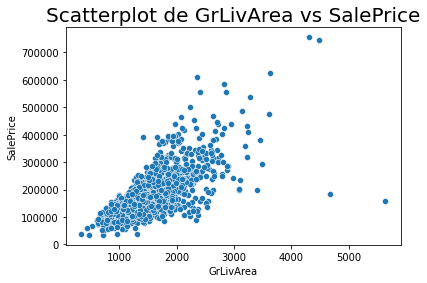

In [150]:
#GrLivArea: Above grade (ground) living area square feet
sns.scatterplot(y="SalePrice", x="GrLivArea", data=df_train)
plt.title("Scatterplot de GrLivArea vs SalePrice", fontsize=20)
plt.show()

##### Existe la relación. Existen outliers

### Relación entre FullBath y SalePrice

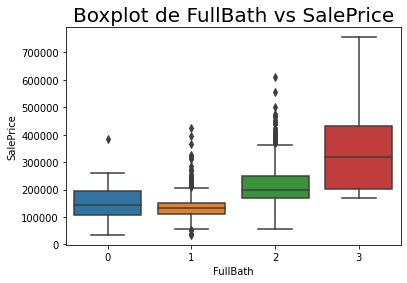

In [152]:
#FullBath: Full bathrooms above grade
sns.boxplot(y="SalePrice", x="FullBath", data=df_train)
plt.title("Boxplot de FullBath vs SalePrice", fontsize=20)
plt.show()

##### Existe la relación. Existen outliers

### Relación entre GarageCars y SalePrice

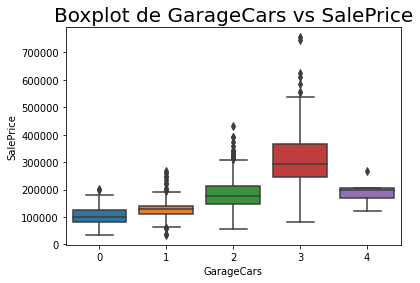

In [153]:
#GarageCars: Size of garage in car capacity
sns.boxplot(y="SalePrice", x="GarageCars", data=df_train)
plt.title("Boxplot de GarageCars vs SalePrice", fontsize=20)
plt.show()

##### Existe una relación. Para el caso de GarageCars=4 existe una anomalía

### Relación entre GarageArea y salePrice:

In [154]:
#GarageArea: Size of garage in square feet
px.scatter(df_train,y="SalePrice", x="GarageArea", color="GarageArea", title="Scatterplot de GarageArea vs SalePrice")

##### Existe la relación. Existen outliers

### Relación entre TotRmsAbvGrd y SalePrice:

In [155]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
px.box(df_train,y="SalePrice", x="TotRmsAbvGrd", color="TotRmsAbvGrd", title="Boxplot de TotRmsAbvGrd vs SalePrice")

##### Existe la relación. Hay una anomalía para el caso de TotRmsAbvGrd=14

## Modelo de ML (LinearRegression):

Defino los datos con los que voy a entrenar el modelo(X) y el valor a predecir/target(Y):

In [195]:
X = df_corr.drop(["SalePrice"], axis=1).values
Y = df_corr["SalePrice"].values

Divido los datos entre los que usaré para entrenar y los que usaré para testear (para este caso los dividí entre 0.8 train y 0.2 test):

In [196]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Entreno el modelo:

In [197]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

Hago la predicción con los datos de testeo:

In [198]:
y_pred = ml.predict(x_test)
print(y_pred)

[265234.81426194 147042.36620358 111990.35647764 225968.78975483
 120266.46808507 116340.99581376 256811.47058559 142937.76815401
 493335.56722748 163465.08372224 213600.21571103 194179.31126711
 228376.66562224 105379.70890343 130235.91563972 143659.6966446
 217682.86587692 101908.91916542 151932.46963111 188006.30695675
 137527.61071313 150177.05671016 107539.5947871  162106.88328248
 188747.97960944 197176.92385273 178020.9320047   51167.31146076
 297244.93814264 112719.08607759 203141.97730315 203520.6081454
 141411.78639152 282391.10418274 319078.43995775 182535.19627312
 272092.07755576 117570.68932496 240238.08566125 311105.37954935
 233644.16084933 129105.29841013 205003.23782    296582.25765003
 327745.36038725 181147.26350619 125706.2107922  112895.82702366
 176625.5140797   70227.01014376 343136.62993567 134440.00112647
 182771.34461237  51835.20851324 232988.75408321 102903.28747792
 106907.71043212 250380.85055164 137305.82081445  83162.43267952
 143538.58262645 114833.096

Comparo el primer valor predicho con el primer valor del dataset

In [232]:
print("Valor real: ",Y[0])
print("Valor predicho: ",ml.predict([X[0]]))

Valor real:  208500
Valor predicho:  [212874.8725404]


root mean squared log error (RMSLE):

In [181]:
print("RMSLE: " + str(mean_squared_log_error(y_test, y_pred, squared=False)))

RMSLE: 0.2340762633104147


Puntaje del R cuadrado:

In [183]:
print("R2: " + str(r2_score(y_test,y_pred)))

R2: 0.637808858716957


Grafica entre el target de testeo y el target predicho (y_test & y_pred):

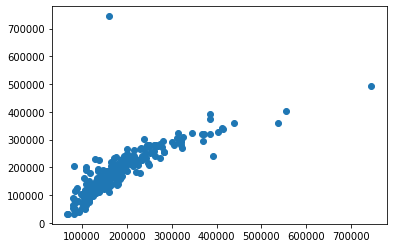

In [187]:
plt.scatter(y_test, y_pred)

---